(821, 616, 3)


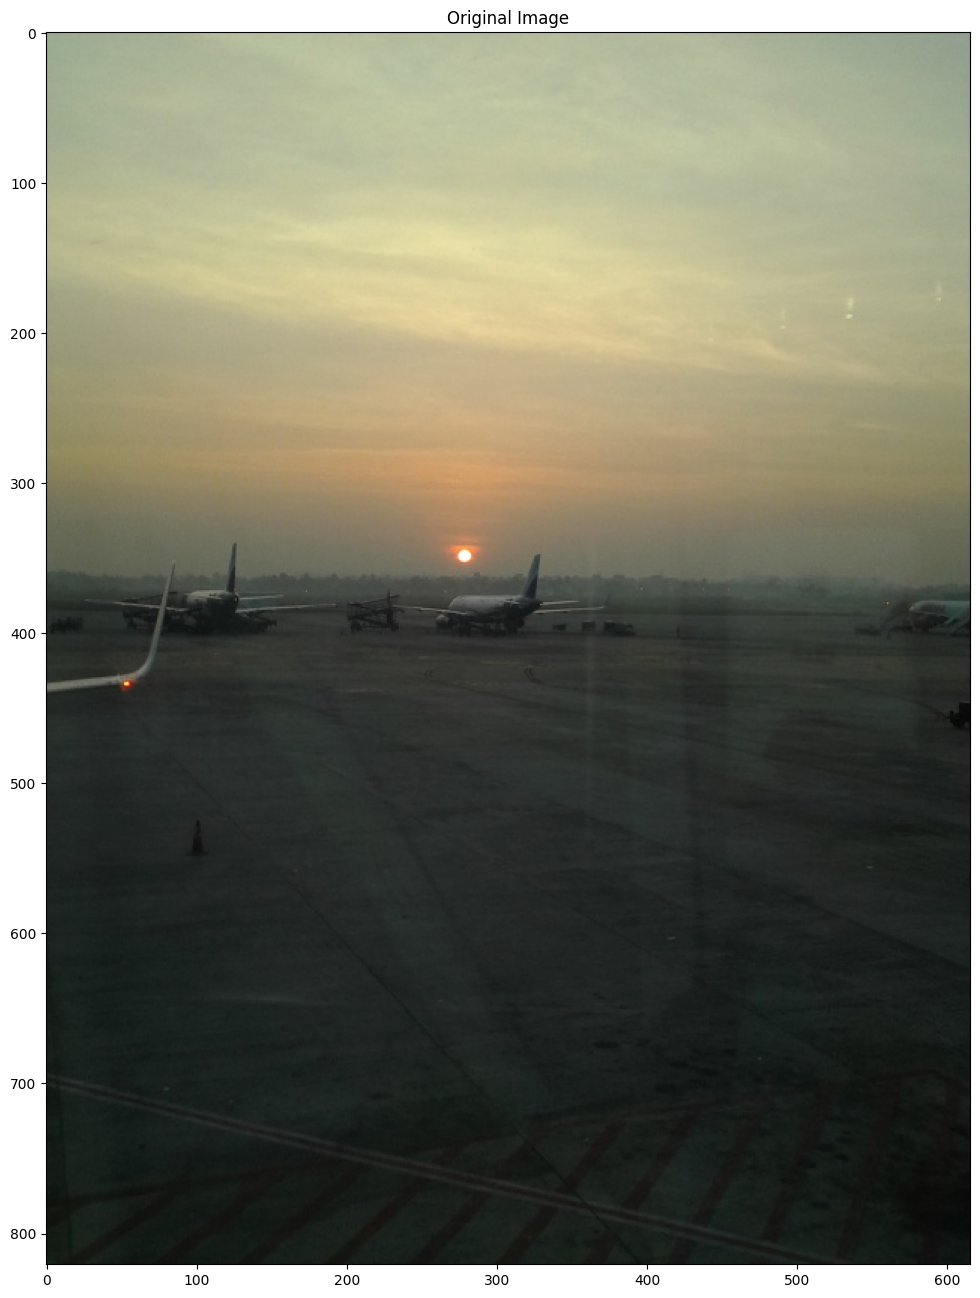

(<matplotlib.image.AxesImage at 0x2717cc4ddc0>, None)

In [8]:
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage import data, draw
from skimage import transform, util
from skimage import io, color, filters
import seam_carving
import numpy as np
from skimage import filters, color
from matplotlib import pyplot as pylab

image = imread('images/aero.jpg')
print(image.shape)
# (821, 616, 3)
image = util.img_as_float(image)
energy_image = filters.sobel(color.rgb2gray(image))
pylab.figure(figsize=(20,16)), pylab.title('Original Image'),
pylab.imshow(image), pylab.show()

(821, 416, 3)


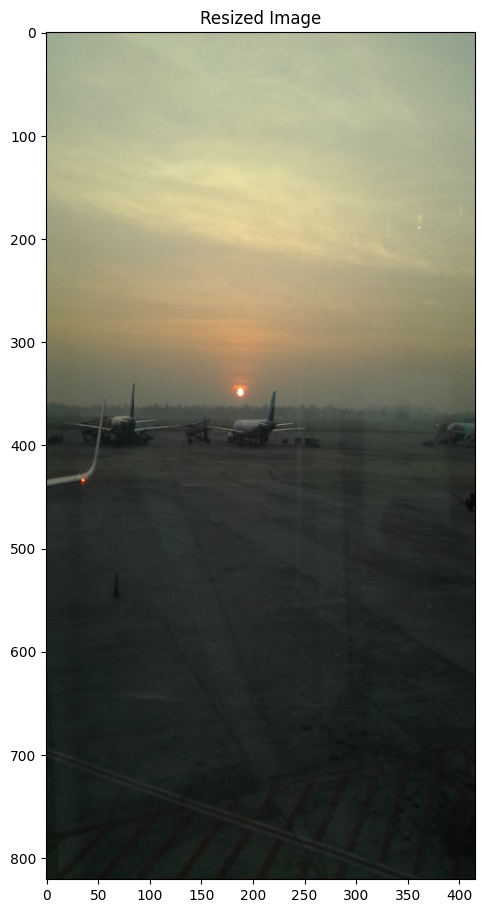

(<matplotlib.image.AxesImage at 0x27176a297c0>, None)

In [ ]:
resized = transform.resize(image, (image.shape[0], image.shape[1] - 200), mode='reflect')
print(resized.shape)
# (821, 416, 3)
pylab.figure(figsize=(20,11)), pylab.title('Resized Image'),
pylab.imshow(resized), pylab.show()

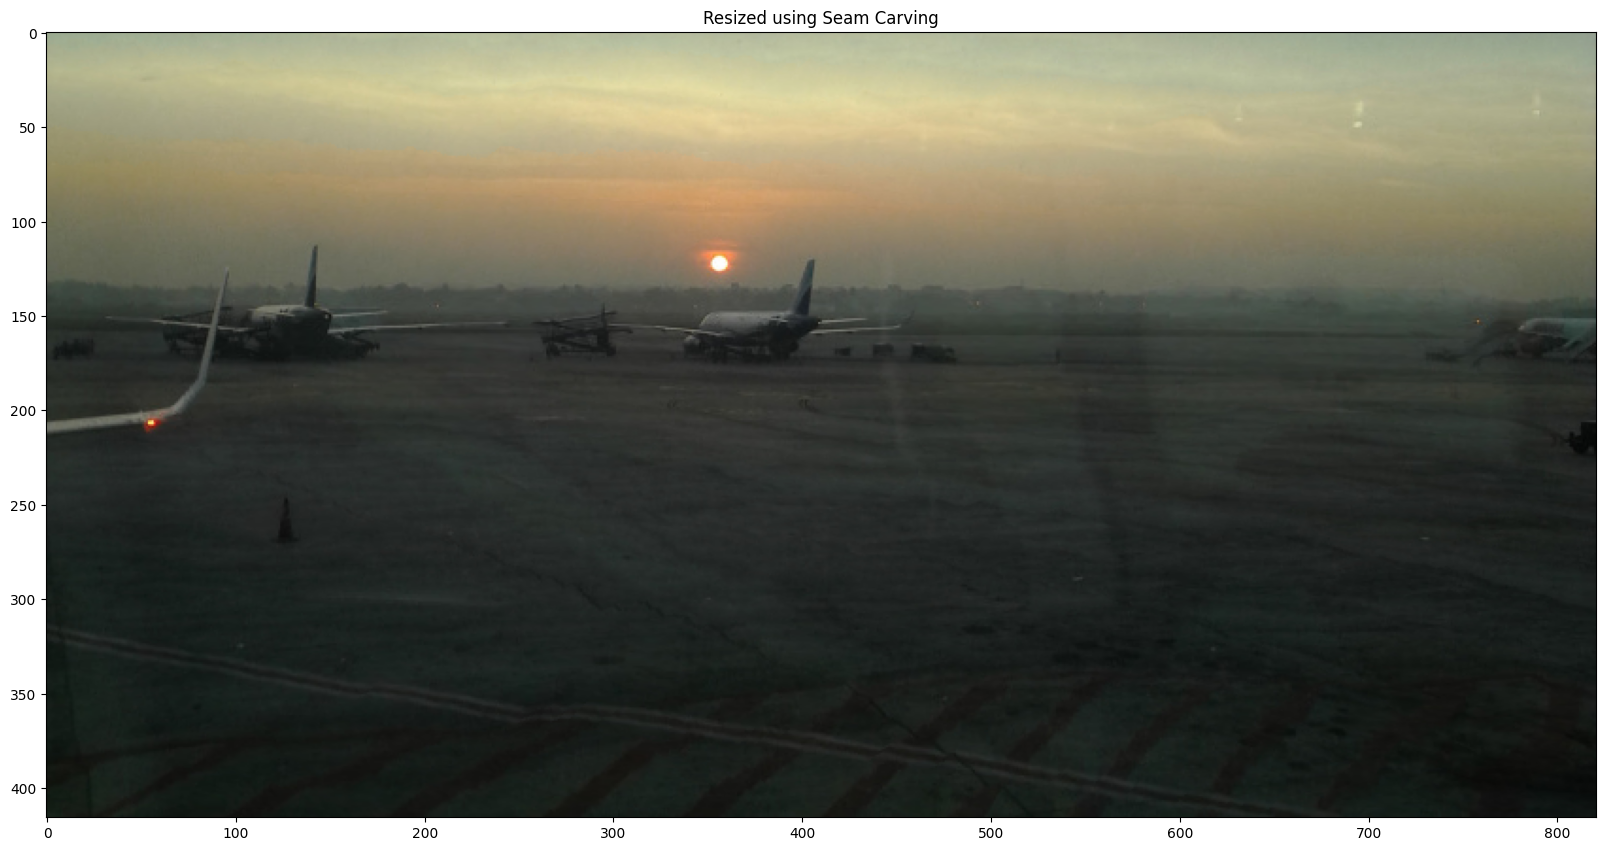

In [12]:
def sobel_energy(image):
    gray_image = color.rgb2gray(image)
    energy = filters.sobel(gray_image)
    return energy

image = util.img_as_float(image)
# Kích thước hiện tại
height, width = image.shape[:2]

# Kích thước mới
new_height = height  # Giữ nguyên chiều cao
new_width = width - 200  # Giảm chiều rộng đi 200 pixel

out = seam_carving.resize(
    image,
    (new_height, new_width),
    energy_mode="backward",
    order="width-first", 
    keep_mask=None, 
)

pylab.figure(figsize=(20,11)), pylab.title('Resized using Seam Carving'),
pylab.imshow(out)

(720, 534, 3)


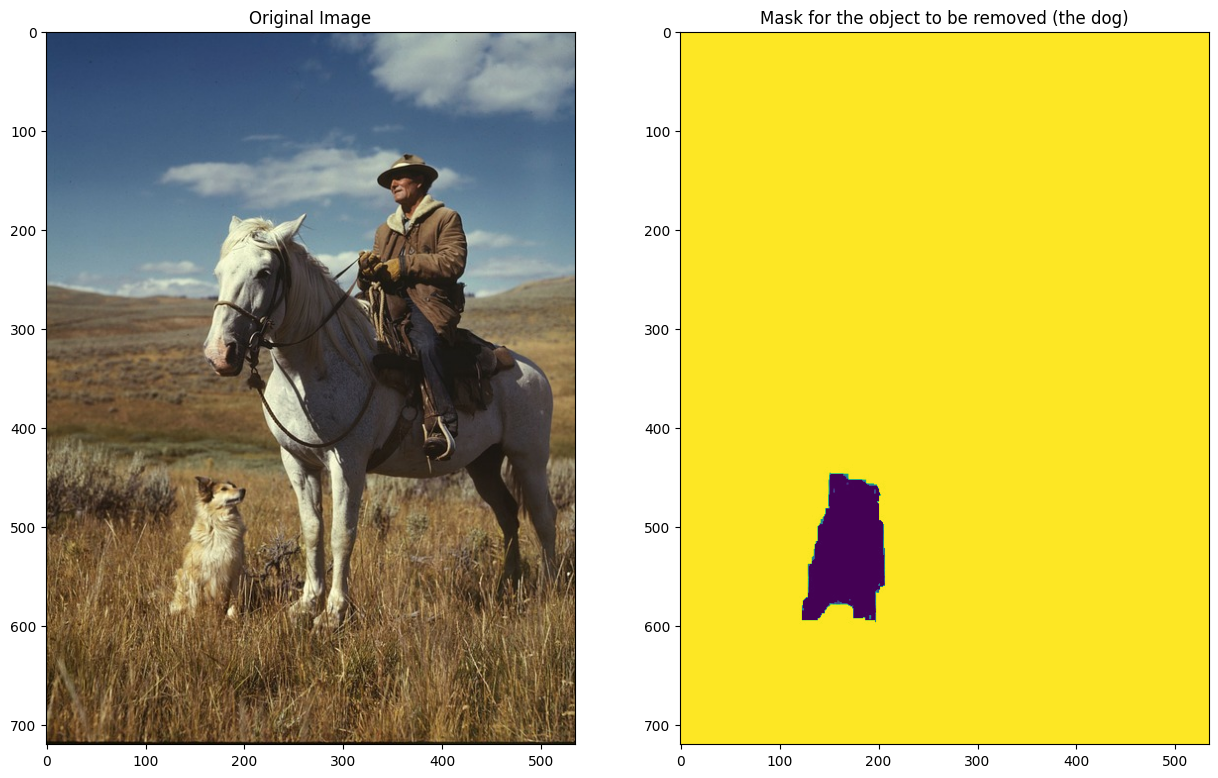

In [ ]:
from skimage.color import rgb2gray 
from skimage.io import imread       
import matplotlib.pyplot as pylab  

# Đọc hình ảnh chính (man.jpg) từ thư mục 'images' và lưu vào biến `image`
image = imread('images/man.jpg')

# Đọc hình ảnh mask (man_mask.jpg) từ thư mục 'images', chuyển sang thang độ xám và lưu vào biến `mask_img`
# Mask là hình ảnh xác định vùng đối tượng cần loại bỏ (con chó)
mask_img = rgb2gray(imread('images/man_mask.jpg'))

# In kích thước của hình ảnh gốc để kiểm tra
print(image.shape)

# Thiết lập kích thước hiển thị cho biểu đồ
pylab.figure(figsize=(15, 10))

# Hiển thị hình ảnh gốc (man.jpg) trên biểu đồ đầu tiên
pylab.subplot(121)  # Tạo subplot ở vị trí đầu tiên (1 hàng, 2 cột, vị trí 1)
pylab.imshow(image)  # Hiển thị hình ảnh gốc
pylab.title('Original Image')  # Đặt tiêu đề cho hình ảnh gốc

# Hiển thị hình ảnh mask (man_mask.jpg) trên biểu đồ thứ hai
pylab.subplot(122)  # Tạo subplot ở vị trí thứ hai (1 hàng, 2 cột, vị trí 2)
pylab.imshow(mask_img)  # Hiển thị hình ảnh mask (thang độ xám)
pylab.title('Mask for the object to be removed (the dog)')  # Đặt tiêu đề cho mask

# Hiển thị cả hai hình ảnh
pylab.show()


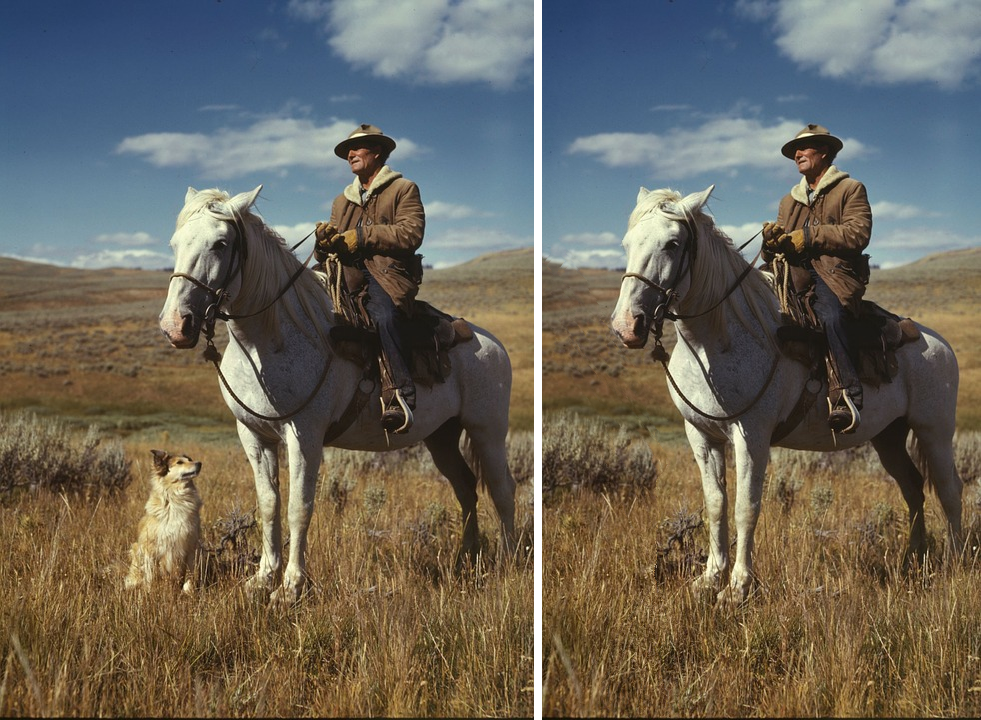

In [ ]:
# Đọc hình ảnh gốc (man.jpg) dưới dạng mảng NumPy
src = np.asarray(Image.open("images/man.jpg"))  # Chuyển hình ảnh thành mảng NumPy
h, w, c = src.shape  # Lấy kích thước của hình ảnh (chiều cao, chiều rộng, số kênh màu)

# Đọc hình ảnh mask (man_mask2.jpg) và chuyển đổi sang thang độ xám
mask = np.asarray(Image.open("images/man_mask2.jpg").convert("L"))  # Mask cần xóa (dạng thang độ xám)

# Sử dụng seam carving để xóa vùng được chỉ định bởi mask
# Tham số drop_mask xác định vùng cần loại bỏ
dog_removed = seam_carving.resize(src, drop_mask=mask)  # Tạo hình ảnh mới với vùng mask được loại bỏ

# Tạo một khoảng trắng (padding) để ngăn cách hai hình ảnh
# `np.full` tạo một mảng có giá trị cố định (255: màu trắng)
padding = np.full((h, 8, c), 255, dtype=np.uint8)  # Tạo padding có chiều cao h, rộng 8 pixel, và số kênh c

# Kết hợp hình ảnh gốc, padding, và hình ảnh sau khi xóa đối tượng (hình ngang)
combined_image = np.hstack((src, padding, dog_removed))  # Xếp ngang các mảng: [hình gốc | padding | hình đã xử lý]

# Chuyển đổi mảng NumPy thành đối tượng Image của PIL để hiển thị hoặc lưu
Image.fromarray(combined_image)

In [39]:
import numpy as np
from skimage import io
import os

# Đường dẫn đến hình ảnh đầu vào và đầu ra
input_image_path = 'images/man_mask.jpg'   # Thay bằng đường dẫn của bạn
output_image_path = 'images/man_mask2.jpg'

# Đọc hình ảnh
image = io.imread(input_image_path, as_gray=True)

# Chuyển đổi hình ảnh sang định dạng uint8
image = (image * 255).astype(np.uint8)

# Chuyển đổi màu trắng thành đen và đen thành trắng
inverted_image = 255 - image

# Lưu hình ảnh kết quả
io.imsave(output_image_path, inverted_image)
print(f'Đã lưu hình ảnh kết quả tại {output_image_path}')


Đã lưu hình ảnh kết quả tại images/man_mask2.jpg
